Libraries and Setup!

In [1]:
import numpy as np 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline  

# Ouptut Data File

In [2]:
stacked_LSTM_15min_file_path = f'./Prediction_StackedLSTM_15min.csv'
stacked_LSTM_30min_file_path = f'./Prediction_StackedLSTM_30min.csv'
stacked_LSTM_45min_file_path = f'./Prediction_StackedLSTM_45min.csv'

hier_LSTM_15min_file_path = f'./Prediction_hiLSTMat_15min.csv'
hier_LSTM_30min_file_path = f'./Prediction_hiLSTMat_30min.csv'
hier_LSTM_45min_file_path = f'./Prediction_hiLSTMat_45min.csv'

stacked_LSTM_att_15min_file_path = f'./Prediction_StackedLSTMat_15min.csv'
stacked_LSTM_att_30min_file_path = f'./Prediction_StackedLSTMat_30min.csv'
stacked_LSTM_att_45min_file_path = f'./Prediction_StackedLSTMat_45min.csv'

ground_truth_15min_file_path = f'./GroundTruth_hiLSTMat_15min.csv'
ground_truth_30min_file_path = f'./GroundTruth_hiLSTMat_30min.csv'
ground_truth_45min_file_path = f'./GroundTruth_hiLSTMat_45min.csv'

# 15 minute plot

In [3]:
stacked_LSTM_15min_df = pd.read_csv(stacked_LSTM_15min_file_path)
hier_LSTM_15min_df = pd.read_csv(hier_LSTM_15min_file_path)
stacked_LSTM_att_15min_df = pd.read_csv(stacked_LSTM_att_15min_file_path)
stacked_LSTM_att_15min_df = pd.read_csv(stacked_LSTM_att_15min_file_path)
ground_truth_15min_df = pd.read_csv(ground_truth_15min_file_path)

stacked_LSTM_15min_df = stacked_LSTM_15min_df.set_index(pd.DatetimeIndex(stacked_LSTM_15min_df['timestamp']))
hier_LSTM_15min_df = hier_LSTM_15min_df.set_index(pd.DatetimeIndex(hier_LSTM_15min_df['timestamp']))
stacked_LSTM_att_15min_df = ground_truth_15min_df.set_index(pd.DatetimeIndex(ground_truth_15min_df['timestamp']))
ground_truth_15min_df = ground_truth_15min_df.set_index(pd.DatetimeIndex(ground_truth_15min_df['timestamp']))


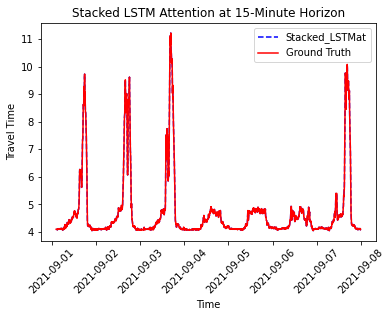

In [4]:
# visualize the above three charts in one
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-09-01"
end_date = "2021-09-07"
route_col = "Route_3"

ground_truth = ground_truth_15min_df.loc[start_date : end_date]
stacked_LSTMat = stacked_LSTM_att_15min_df.loc[start_date : end_date]

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(stacked_LSTMat.index)
data_df['Travel Time'] = stacked_LSTMat[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Stacked_LSTMat", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('Stacked LSTM Attention at 15-Minute Horizon')

plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(md.DayLocator(interval=1)) 

plt.xticks(rotation=45)
plt.savefig("15-Minute Horizon.png", dpi=300)
plt.show()


# 30 Minute Plot

In [10]:
stacked_LSTM_30min_df = pd.read_csv(stacked_LSTM_30min_file_path)
hier_LSTM_30min_df = pd.read_csv(hier_LSTM_30min_file_path)
stacked_LSTM_att_30min_df = pd.read_csv(stacked_LSTM_att_30min_file_path)
ground_truth_30min_df = pd.read_csv(ground_truth_30min_file_path)

stacked_LSTM_30min_df = stacked_LSTM_30min_df.set_index(pd.DatetimeIndex(stacked_LSTM_30min_df['timestamp']))
hier_LSTM_30min_df = hier_LSTM_30min_df.set_index(pd.DatetimeIndex(hier_LSTM_30min_df['timestamp']))
stacked_LSTM_att_30min_df = stacked_LSTM_att_30min_df.set_index(pd.DatetimeIndex(stacked_LSTM_att_30min_df['timestamp']))
ground_truth_30min_df = ground_truth_30min_df.set_index(pd.DatetimeIndex(ground_truth_30min_df['timestamp']))

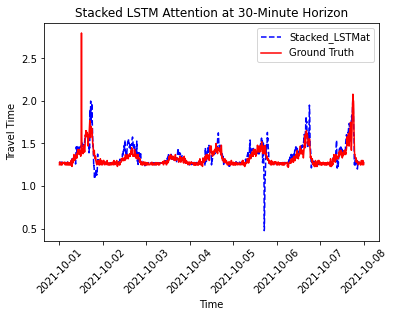

In [11]:
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-10-01"
end_date = "2021-10-07"
route_col = "Route_5"

ground_truth = ground_truth_30min_df.loc[start_date : end_date]
stacked_LSTMat = stacked_LSTM_att_30min_df.loc[start_date : end_date]

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(stacked_LSTMat.index)
data_df['Travel Time'] = stacked_LSTMat[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

# formatter = md.DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(formatter)
# locator = md.DayLocator()
# ax.xaxis.set_major_locator(locator)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Stacked_LSTMat", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('Stacked LSTM Attention at 30-Minute Horizon')

plt.xticks(rotation=45)
plt.savefig("30-Minute Horizon.png", dpi=300)
plt.show()


# 45 Minutes Plot

In [3]:
stacked_LSTM_45min_df = pd.read_csv(stacked_LSTM_45min_file_path)
hier_LSTM_45min_df = pd.read_csv(hier_LSTM_45min_file_path)
stacked_LSTM_att_45min_df = pd.read_csv(stacked_LSTM_att_45min_file_path)
ground_truth_45min_df = pd.read_csv(ground_truth_45min_file_path)

stacked_LSTM_45min_df = stacked_LSTM_45min_df.set_index(pd.DatetimeIndex(stacked_LSTM_45min_df['timestamp']))
hier_LSTM_45min_df = hier_LSTM_45min_df.set_index(pd.DatetimeIndex(hier_LSTM_45min_df['timestamp']))
stacked_LSTM_att_45min_df = stacked_LSTM_att_45min_df.set_index(pd.DatetimeIndex(stacked_LSTM_att_45min_df['timestamp']))
ground_truth_45min_df = ground_truth_45min_df.set_index(pd.DatetimeIndex(ground_truth_45min_df['timestamp']))

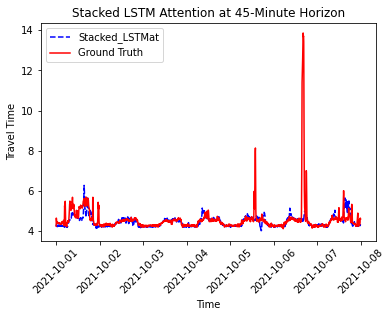

In [4]:
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-10-01"
end_date = "2021-10-07"
route_col = "Route_12"

ground_truth = ground_truth_45min_df.loc[start_date : end_date]
stacked_LSTMat = stacked_LSTM_att_45min_df.loc[start_date : end_date]

# ticklabels = np.unique(hier_LSTM_att.index.strftime('%Y-%m-%d'))
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# plt.show()

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(stacked_LSTMat.index)
data_df['Travel Time'] = stacked_LSTMat[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

# formatter = md.DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(formatter)
# locator = md.DayLocator()
# ax.xaxis.set_major_locator(locator)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Stacked_LSTMat", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('Stacked LSTM Attention at 45-Minute Horizon')

# ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(md.DayLocator(interval=1)) 

plt.xticks(rotation=45)
plt.savefig("45-Minute Horizon.png", dpi=300)
plt.show()
